# WeatherPy
----

### Analysis
- Temperature varies depending on Latidude, whith higher temperatures observed near the Equator. Examples of hottest cities in the world today: Taoudenni (Timbuktu) and Adrar (Algeria).
- Most of the world has wind below 6mph today (July 4th)
- Humidity is measured by a scale of 0-100, but we observe one outlier in peru (city called Talara), with humiduty at 290, which is not possible. This is problaby a mistake in the Weather website.
- Cloudiness and Latitute are not correlated.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
        
# Print the city count to confirm sufficient count
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(index=str, columns={0: "City"})
cities_df = cities_df.head(600)
# cities_df['Lat'] = ""
# cities_df['Long'] = ""
cities_df['Temp'] = ""

cities_df.head()

,City,Temp
0,hobart,
1,san carlos de bariloche,
2,atuona,
3,mersing,
4,upernavik,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

params = {
    "appid": api_key,
    "units": "metric"
}

print(f'Before for loop')

Count = 1

for index, row in cities_df.iterrows():

        # get lat, lng from df
#     lat = row["Lat"]
#     lng = row["Lng"]
    city = row['City']

    # change location each iteration while leaving original params in place
    params["q"] = f"{city}"
    
    # make request
    city_object = requests.get(base_url, params=params).json()
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(response)
    
# Since some data may be missing we incorporate a try-except to skip any that are missing a data point. 
    try:
        cities_df.loc[index, "Temp"] = city_object["main"]["temp"]
        cities_df.loc[index, "Pressure"] = city_object["main"]["pressure"]
        cities_df.loc[index, "Humidity"] = city_object["main"]["humidity"]
        cities_df.loc[index, "Wind"] = city_object["wind"]["speed"]
        cities_df.loc[index, "Clouds"] = city_object["clouds"]["all"]
        cities_df.loc[index, "Lat"] = city_object["coord"]["lat"]
        cities_df.loc[index, "Long"] = city_object["coord"]["lon"]
        cities_df.loc[index, "Count"] = Count

        print(f' Processing city # {Count} and name: {city}')
        Count +=1
        
    except (KeyError, IndexError):
        print("City not found... skipping.")  
    
print("DONE! :)")            

Before for loop
 Processing city # 1 and name: hobart
 Processing city # 2 and name: san carlos de bariloche
 Processing city # 3 and name: atuona
 Processing city # 4 and name: mersing
 Processing city # 5 and name: upernavik
 Processing city # 6 and name: ushuaia
 Processing city # 7 and name: porto
 Processing city # 8 and name: qianan
City not found... skipping.
 Processing city # 9 and name: mar del plata
 Processing city # 10 and name: havoysund
City not found... skipping.
 Processing city # 11 and name: kapaa
 Processing city # 12 and name: cherskiy
 Processing city # 13 and name: ilulissat
 Processing city # 14 and name: marquette
 Processing city # 15 and name: geraldton
 Processing city # 16 and name: tiksi
 Processing city # 17 and name: pisco
 Processing city # 18 and name: michigan city
 Processing city # 19 and name: nikolskoye
 Processing city # 20 and name: okhotsk
 Processing city # 21 and name: busselton
 Processing city # 22 and name: atchison
 Processing city # 23 a

 Processing city # 186 and name: veydelevka
 Processing city # 187 and name: port lincoln
 Processing city # 188 and name: hermanus
 Processing city # 189 and name: portree
 Processing city # 190 and name: kruisfontein
 Processing city # 191 and name: khani
 Processing city # 192 and name: beloha
 Processing city # 193 and name: makakilo city
City not found... skipping.
 Processing city # 194 and name: morant bay
 Processing city # 195 and name: houston
 Processing city # 196 and name: longyearbyen
 Processing city # 197 and name: taywarah
 Processing city # 198 and name: yellowknife
 Processing city # 199 and name: pevek
City not found... skipping.
 Processing city # 200 and name: dingle
 Processing city # 201 and name: thayetmyo
 Processing city # 202 and name: merauke
City not found... skipping.
 Processing city # 203 and name: isangel
 Processing city # 204 and name: atar
 Processing city # 205 and name: cabo san lucas
 Processing city # 206 and name: poum
 Processing city # 207 an

 Processing city # 363 and name: gualaquiza
 Processing city # 364 and name: filadelfia
 Processing city # 365 and name: rawlins
 Processing city # 366 and name: salamanca
 Processing city # 367 and name: hede
 Processing city # 368 and name: dong xoai
City not found... skipping.
 Processing city # 369 and name: saint anthony
 Processing city # 370 and name: souillac
 Processing city # 371 and name: waitati
City not found... skipping.
 Processing city # 372 and name: inta
 Processing city # 373 and name: labuhan
 Processing city # 374 and name: discovery bay
 Processing city # 375 and name: suoyarvi
 Processing city # 376 and name: taonan
 Processing city # 377 and name: gobabis
City not found... skipping.
 Processing city # 378 and name: saint-pierre
City not found... skipping.
 Processing city # 379 and name: chupa
 Processing city # 380 and name: qiongshan
 Processing city # 381 and name: cervo
 Processing city # 382 and name: palmas de monte alto
 Processing city # 383 and name: mo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Visualize to confirm
cities_df.head()

,City,Temp,Pressure,Humidity,Wind,Clouds,Lat,Long,Count
0,hobart,3.44,1040.00,93.0,2.60,75.0,-42.88,147.33,1.0
1,san carlos de bariloche,6,1022.00,52.0,5.70,20.0,-41.13,-71.31,2.0
2,atuona,26.65,1012.81,68.0,3.64,30.0,-9.80,-139.03,3.0
3,mersing,24.15,1010.34,94.0,0.74,0.0,2.43,103.84,4.0
4,upernavik,5.85,1023.16,70.0,4.71,0.0,72.79,-56.15,5.0


In [7]:
# clean up
cities_df = cities_df.dropna()

cities_df.head()

,City,Temp,Pressure,Humidity,Wind,Clouds,Lat,Long,Count
0,hobart,3.44,1040.00,93.0,2.60,75.0,-42.88,147.33,1.0
1,san carlos de bariloche,6,1022.00,52.0,5.70,20.0,-41.13,-71.31,2.0
2,atuona,26.65,1012.81,68.0,3.64,30.0,-9.80,-139.03,3.0
3,mersing,24.15,1010.34,94.0,0.74,0.0,2.43,103.84,4.0
4,upernavik,5.85,1023.16,70.0,4.71,0.0,72.79,-56.15,5.0


In [8]:
# export to csv
cities_df.to_csv(output_data_file, index=False)

In [117]:
# cities_df.cut(cities_df["Temp"],3)
cities_df["Temp"] = cities_df.Temp.astype(float)
cities_df.dtypes
cities_df["Temp Cat"] = pd.cut(cities_df["Temp"] , 3, labels=['Cold','Medium','Hot'])

Hot_cities = cities_df.loc[cities_df['Temp Cat'] == 'Hot' , ['City', 'Temp']]
Hot_cities = Hot_cities.sort_values(by = 'Temp', ascending=False)
Hot_cities.head()

,City,Temp
159,taoudenni,45.05
316,adrar,45.00
224,atar,45.00
261,kidal,41.25
317,aswan,38.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

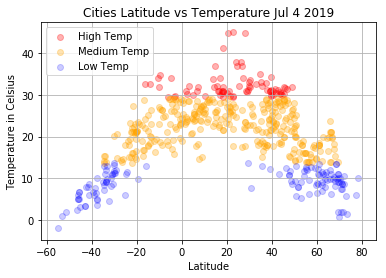

In [105]:
from matplotlib import cm
import colorcet as cc

x_low = cities_df.loc[cities_df['Temp Cat'] == 'Cold' , ['Lat']]
y_low = cities_df.loc[cities_df['Temp Cat'] == 'Cold' , ['Temp']]

x_high = cities_df.loc[cities_df['Temp Cat'] == 'Hot' , ['Lat']]
y_high = cities_df.loc[cities_df['Temp Cat'] == 'Hot' , ['Temp']]

x_medium = cities_df.loc[cities_df['Temp Cat'] == 'Medium' , ['Lat']]
y_medium = cities_df.loc[cities_df['Temp Cat'] == 'Medium' , ['Temp']]

# cmap=cc.palette["fire"]
# plt.scatter(x, y, alpha=0.5, cmap=cet_fire)

plt.scatter(x_high, y_high, alpha=0.3, c='red', label='High Temp')
plt.scatter(x_medium, y_medium, alpha=0.3, c='orange', label='Medium Temp')
plt.scatter(x_low, y_low, alpha=0.2, c= 'blue', label='Low Temp')


plt.xlabel("Latitude")
plt.ylabel("Temperature in Celsius")
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Cities Latitude vs Temperature Jul 4 2019')
plt.show()

#### Latitude vs. Humidity Plot

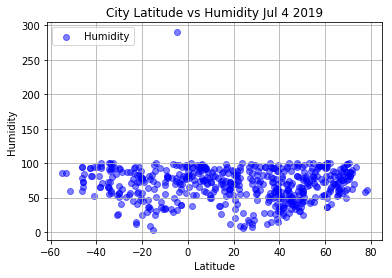

In [102]:
x = cities_df["Lat"]
y = cities_df["Humidity"]

plt.scatter(x, y, c='blue', alpha=0.5, )

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend(loc='upper left')
plt.grid(True)
plt.title('City Latitude vs Humidity Jul 4 2019')
plt.show()

In [119]:
Top_humidity = cities_df.sort_values(by = 'Humidity', ascending=False)
Top_humidity.head()

,City,Temp,Pressure,Humidity,Wind,Clouds,Lat,Long,Count,Temp Cat
127,talara,17.00,1012.0,290.0,8.2,0.0,-4.58,-81.27,113.0,Medium
133,esperance,12.00,1005.0,100.0,3.6,90.0,-33.86,121.89,119.0,Cold
525,clyde river,2.00,1020.0,100.0,2.6,90.0,70.47,-68.59,466.0,Cold
322,hasaki,18.96,1006.0,100.0,3.1,40.0,35.73,140.83,293.0,Medium
555,strezhevoy,18.00,1001.0,100.0,2.0,65.0,60.73,77.60,496.0,Medium


#### Latitude vs. Cloudiness Plot

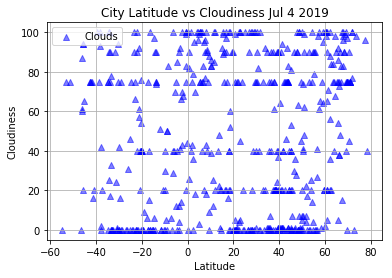

In [103]:
x = cities_df["Lat"]
y = cities_df["Clouds"]

plt.scatter(x, y, c='blue', alpha=0.5, marker='^')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(loc='upper left')
plt.grid(True)
plt.title('City Latitude vs Cloudiness Jul 4 2019')
plt.show()

#### Latitude vs. Wind Speed Plot

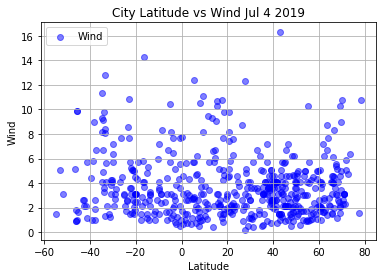

In [104]:
x = cities_df["Lat"]
y = cities_df["Wind"]

plt.scatter(x, y, c='blue', alpha=0.5,  )

plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.legend(loc='upper left')
plt.grid(True)
plt.title('City Latitude vs Wind Jul 4 2019')
plt.show()